In [1]:
!pip install pyLDAvis==3.4.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import nltk
import gensim
import pickle
import numpy as np

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AffinityPropagation
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer

# Visualization & topic modelling
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --user pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import plotly
import plotly.express as px

# utility modules
from ast import literal_eval


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
/shared-libs/python3.9/py/lib/python3.9/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [3]:
# Load corpus_words from the pickle file
with open('/work/GitHub_ML_Deepnote/Machine Learning/3. Word2vec /corpus_words.pkl', 'rb') as file:
    corpus_words = pickle.load(file)

In [4]:
dictionary = corpora.Dictionary(corpus_words)
doc_term_matrix = [dictionary.doc2bow(i) for i in corpus_words]

In [5]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [27]:
# Build LDA model
corpus_LDA = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [28]:
corpus_LDA.print_topics()

[(0,
  '0.022*"people" + 0.020*"ai" + 0.013*"job" + 0.012*"get" + 0.012*"go" + 0.011*"work" + 0.010*"make" + 0.010*"year" + 0.010*"think" + 0.009*"like"'),
 (1,
  '0.013*"drive" + 0.012*"speed" + 0.009*"law" + 0.009*"camera" + 0.007*"go" + 0.007*"phone" + 0.007*"get" + 0.007*"police" + 0.006*"car" + 0.006*"surveillance"'),
 (2,
  '0.007*"lol" + 0.006*"finance" + 0.006*"like" + 0.005*"online" + 0.005*"youre" + 0.005*"right" + 0.005*"security" + 0.005*"smarter" + 0.005*"look" + 0.004*"couldnt"'),
 (3,
  '0.007*"climate" + 0.006*"thanks" + 0.006*"music" + 0.005*"wall" + 0.004*"google" + 0.004*"trump" + 0.004*"shit" + 0.004*"wed" + 0.003*"reddit" + 0.003*"profession"'),
 (4,
  '0.032*"ai" + 0.012*"human" + 0.010*"use" + 0.009*"people" + 0.009*"make" + 0.008*"like" + 0.008*"think" + 0.007*"could" + 0.007*"would" + 0.006*"thing"')]

In [29]:
pyLDAvis.enable_notebook()
vis_1 = pyLDAvis.gensim.prepare(corpus_LDA, doc_term_matrix, dictionary)
vis_1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.217047 -0.043449       1        1  51.777652
0      0.223267 -0.029801       2        1  31.440874
1     -0.033001  0.206645       3        1   7.964567
2     -0.184667 -0.178945       4        1   5.794930
3     -0.222645  0.045550       5        1   3.021976, topic_info=        Term         Freq        Total Category  logprob  loglift
479      job   685.000000   685.000000  Default  30.0000  30.0000
330   people  2028.000000  2028.000000  Default  29.0000  29.0000
5         ai  3791.000000  3791.000000  Default  28.0000  28.0000
263       go   975.000000   975.000000  Default  27.0000  27.0000
260      get  1099.000000  1099.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1008    shit    18.591656   142.289840   Topic5  -5.5958   1.4641
1003    read    15.036764   114.956410   Topic5  -5.8080   1.4652
817     head    13.082985    53.017612   Topic5  -5.9472   2.0999
193      bit    13.332563   100.674691   Topic5  -5.9283   1.4776
570     yeah    12.828516   126.235846   Topic5  -5.9668   1.2128

[309 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
771       1  0.504692        ...
771       2  0.322073        ...
771       3  0.053125        ...
771       4  0.099610        ...
771       5  0.016602        ...
...     ...       ...        ...
416       1  0.369515      youre
416       2  0.283387      youre
416       3  0.213930      youre
416       4  0.133359      youre
8166      3  0.973396  yudkowsky

[443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 3, 4])

In [30]:
# Display the visualization with CSS styling for width and height
html_output = pyLDAvis.display(vis_1, False)
html_output.data = html_output.data.replace("80%", "600px").replace("1400px", "600px")


In [31]:
# Specifying the full path for saving the HTML file
html_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/corpus_lda_visualization.html'

# Saving as an HTML file
pyLDAvis.save_html(vis_1, html_save_path)

In [32]:
# a measure of how good the model is. lower preplexity score the better.
print('\nPerplexity: ', corpus_LDA.log_perplexity(doc_term_matrix,total_docs=10000)) 


Perplexity:  -7.716864287367974


In [33]:
# Compute Coherence Score, higher score is best. 
coherence_model_lda = CoherenceModel(model=corpus_LDA, texts=corpus_words, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.45909244533037086


In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts= corpus_words, start=2, limit=50, step=1)

### This graph will shift and change as we add more links so the optimum cluster size is not chosen for the final visualisation yet, this is just a placeholder

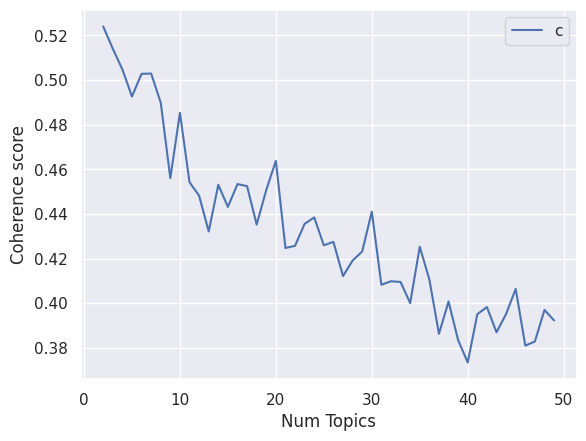

In [15]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
# Saving the coherence graph as an image file
coherence_graph_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/coherence_graph.png'
plt.savefig(coherence_graph_save_path)


<Figure size 640x480 with 0 Axes>

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.524
Num Topics = 3  has Coherence Value of 0.5141
Num Topics = 4  has Coherence Value of 0.5048
Num Topics = 5  has Coherence Value of 0.4926
Num Topics = 6  has Coherence Value of 0.5028
Num Topics = 7  has Coherence Value of 0.5029
Num Topics = 8  has Coherence Value of 0.4898
Num Topics = 9  has Coherence Value of 0.456
Num Topics = 10  has Coherence Value of 0.4853
Num Topics = 11  has Coherence Value of 0.4542
Num Topics = 12  has Coherence Value of 0.4481
Num Topics = 13  has Coherence Value of 0.4321
Num Topics = 14  has Coherence Value of 0.453
Num Topics = 15  has Coherence Value of 0.4431
Num Topics = 16  has Coherence Value of 0.4534
Num Topics = 17  has Coherence Value of 0.4524
Num Topics = 18  has Coherence Value of 0.4352
Num Topics = 19  has Coherence Value of 0.4507
Num Topics = 20  has Coherence Value of 0.4638
Num Topics = 21  has Coherence Value of 0.4247
Num Topics = 22  has Coherence Value of 0.4257
Num Topics = 23  has Coh

In [22]:
optimal_model = model_list[10]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.010*"quantum" + 0.007*"human" + 0.005*"superintelligence" + 0.005*"overlord" + 0.005*"token" + 0.005*"excite" + 0.005*"know" + 0.005*"failure" + 0.005*"think" + 0.005*"instruction"'),
 (1,
  '0.016*"ai" + 0.015*"art" + 0.013*"people" + 0.012*"make" + 0.010*"use" + 0.010*"well" + 0.008*"time" + 0.008*"get" + 0.008*"work" + 0.007*"like"'),
 (2,
  '0.022*"ai" + 0.015*"think" + 0.015*"year" + 0.011*"work" + 0.010*"artist" + 0.009*"art" + 0.009*"ive" + 0.008*"use" + 0.008*"people" + 0.008*"make"'),
 (3,
  '0.016*"go" + 0.009*"people" + 0.008*"dont" + 0.007*"ai" + 0.006*"remove" + 0.006*"law" + 0.006*"thing" + 0.005*"get" + 0.005*"raise" + 0.005*"one"'),
 (4,
  '0.010*"ai" + 0.009*"theft" + 0.008*"gpt4" + 0.008*"agi" + 0.006*"people" + 0.006*"inevitable" + 0.005*"get" + 0.005*"go" + 0.005*"embrace" + 0.005*"think"'),
 (5,
  '0.009*"ai" + 0.008*"graphic" + 0.007*"like" + 0.007*"designer" + 0.007*"logo" + 0.006*"design" + 0.006*"thank" + 0.006*"human" + 0.005*"sentience" + 0.005*"lea

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_2 = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis_2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.091430 -0.035786       1        1  23.255510
10     0.087888  0.009844       2        1  22.613641
9      0.103125 -0.002434       3        1  18.847778
6      0.053884 -0.066298       4        1   7.956909
11     0.029835  0.017282       5        1   6.214297
2      0.059460 -0.028666       6        1   5.525592
1      0.035253  0.077878       7        1   5.141363
8     -0.037399  0.057659       8        1   3.622297
3     -0.089284  0.091870       9        1   2.529619
5     -0.105179 -0.040926      10        1   1.594954
0     -0.140048 -0.069948      11        1   1.374523
4     -0.088965 -0.010476      12        1   1.323517, topic_info=        Term         Freq        Total Category  logprob  loglift
5         ai  4189.000000  4189.000000  Default  30.0000  30.0000
263       go  1045.000000  1045.000000  Default  29.0000  29.0000
3054     art   768.000000   768.000000  Default  28.0000  28.0000
49     human  1267.000000  1267.000000  Default  27.0000  27.0000
330   people  2130.000000  2130.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
588    great     7.235672   181.505778  Topic12  -5.7138   1.1026
432     like     9.061430  1452.979996  Topic12  -5.4888  -0.7525
3054     art     8.437047   768.771887  Topic12  -5.5602  -0.1873
416    youre     7.732154   370.735944  Topic12  -5.6475   0.4548
673     good     7.388940   529.643732  Topic12  -5.6929   0.0527

[911 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
771       1  0.175078    ...
771       2  0.159720    ...
771       3  0.107504    ...
771       4  0.125933    ...
771       5  0.150506    ...
...     ...       ...    ...
416      11  0.008092  youre
416      12  0.021579  youre
5193      2  0.068312    yup
5193      3  0.341561    yup
5193     10  0.546498    yup

[2546 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 10, 7, 12, 3, 2, 9, 4, 6, 1, 5])

In [24]:
#The visualization with CSS styling for width and height
html_output = pyLDAvis.display(vis_2, False)
html_output.data = html_output.data.replace("80%", "600px").replace("1400px", "600px")


In [25]:
# Specifying the full path for saving the HTML file
html_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/corpus_optimal_lda.html'

# Saving as an HTML file
pyLDAvis.save_html(vis_2, html_save_path)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f64215d6-debc-46bd-b273-63565459a66d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>